In [1]:
from kitaev import *
from tqdm import tqdm
from scipy.misc import derivative as dif
from scipy.integrate import quad
plt.style.use(["seaborn-poster",'mystyle.mplstyle'])

C:\Users\eslam\AppData\Local\Temp\ipykernel_4232\1954661445.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-poster",'mystyle.mplstyle'])


In [8]:
var_mu = np.linspace(0,5,50)
var_T = np.linspace(0.2, 5, 51)
zero_modes_nums = []
pi_modes_nums = []
for i in tqdm(range(len(var_mu))):
    t=1
    N_global = 50
    d_global = 2
    mu1 = 0* t 
    mu2 = var_mu[i] * t
    delta1 = 1 * t 
    delta2 = 1 * t 
    t1 = 1 * t 
    t2 = 1 * t
    h_1 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu1), v=offsite(_delta=delta1, _t=t1))
    h_2 = Hamiltonian(d=d_global, N=N_global, u=onsite(_mu=mu2), v=offsite(_delta=delta2, _t=t2))

    zero_modes_num = []
    pi_modes_num = []

    for j in (range(len(var_T))):
        eval, evec = floquet_hamiltonian([h_2.lattice_hamiltonian(), h_1.lattice_hamiltonian()], T=var_T[j])
        modes_ind,cnt_modes = check_modes(eval,0,e_threshold=1e-3)
        zero_modes_num.append(cnt_modes)
        modes_ind,cnt_modes = check_modes(eval,1,e_threshold=1e-3)
        pi_modes_num.append(cnt_modes)
    
    zero_modes_nums.append(zero_modes_num)
    pi_modes_nums.append(pi_modes_num)

zero_modes_nums = np.array(zero_modes_nums)
pi_modes_nums = np.array(pi_modes_nums)


100%|██████████| 50/50 [00:54<00:00,  1.09s/it]


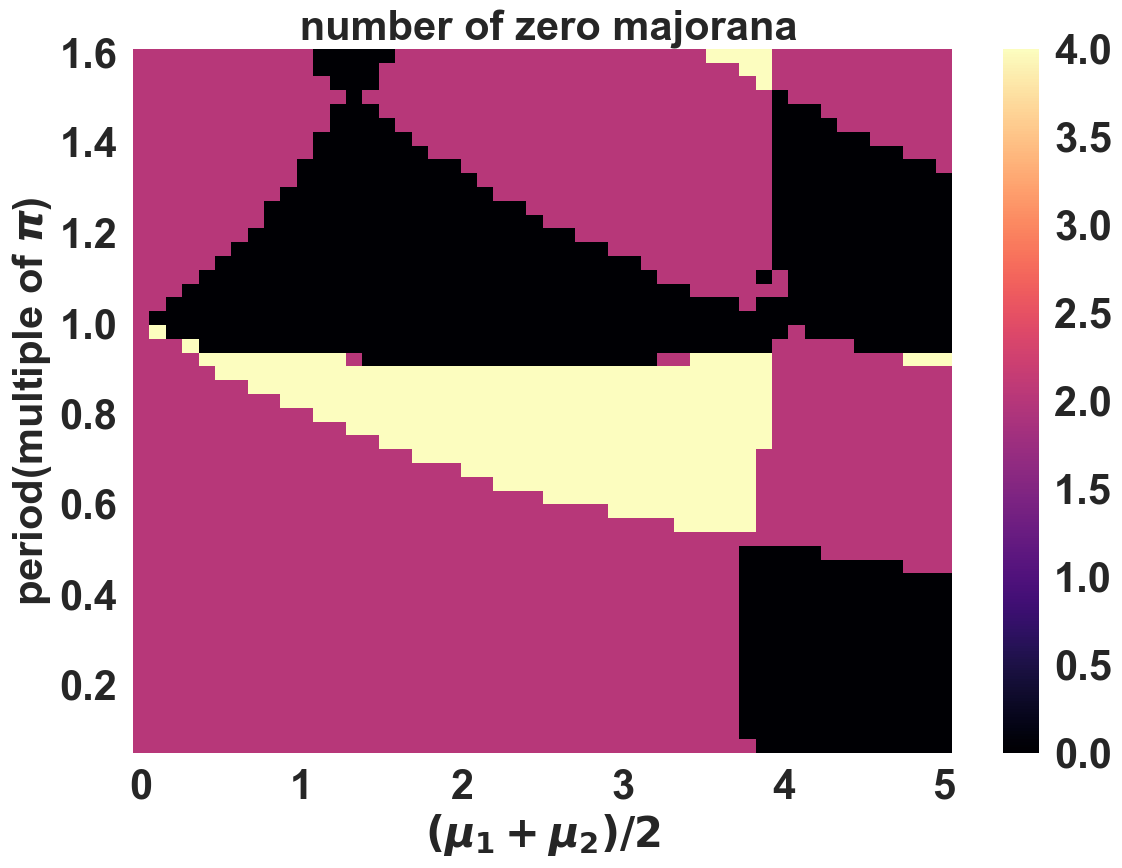

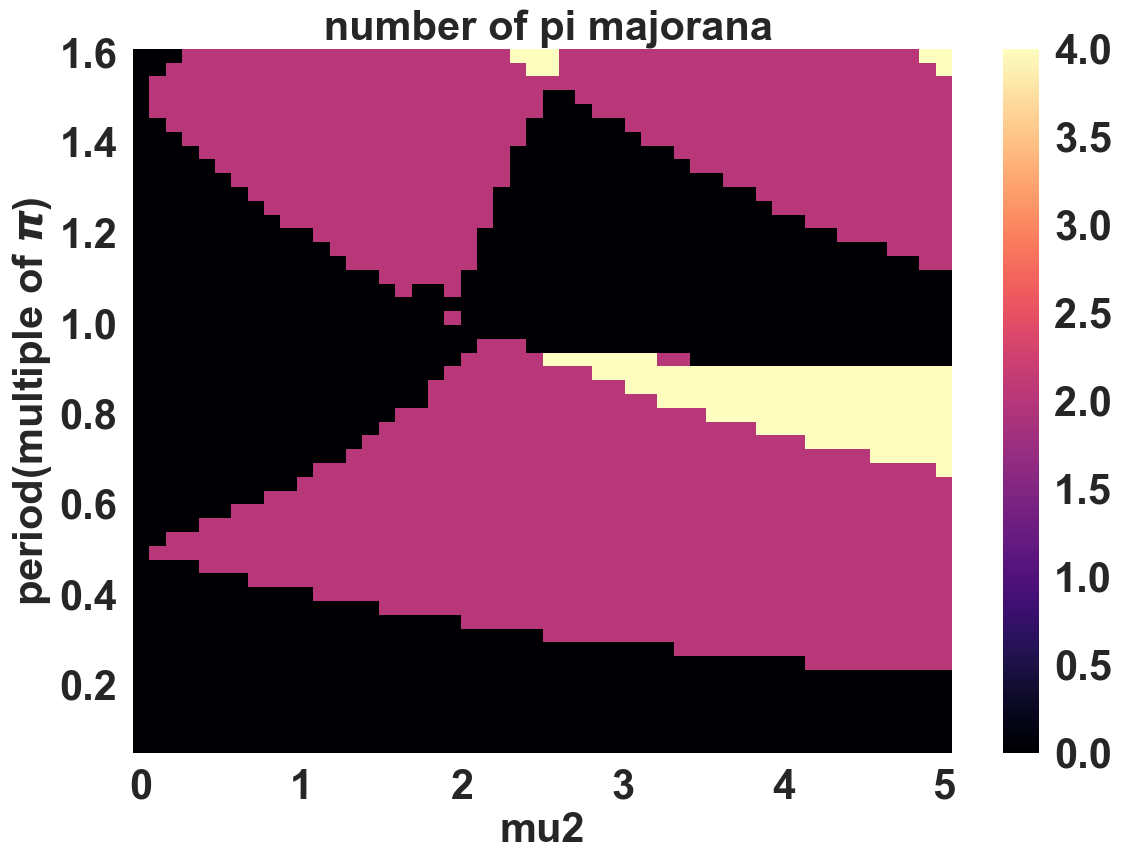

In [11]:
_n = 9
x, y = np.meshgrid(var_mu, var_T)
zero_modes_nums2d = np.zeros((len(var_T),len(var_mu)))
pi_modes_nums2d = np.zeros((len(var_T),len(var_mu)))
for i in range(len(var_mu)):
    for j in range(len(var_T)):
        zero_modes_nums2d[j,i] = zero_modes_nums[i,j]
        pi_modes_nums2d[j,i] = pi_modes_nums[i,j]

        if zero_modes_nums2d[j,i] > _n:
            zero_modes_nums2d[j,i] = zero_modes_nums2d[j-1,i]
        if pi_modes_nums2d[j,i] > _n:
            pi_modes_nums2d[j,i] = pi_modes_nums2d[j-1,i]


fig = plt.figure()
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = plt.pcolormesh(x, y/np.pi, np.abs((zero_modes_nums2d)), cmap='magma')
plt.colorbar(cp)

ax.set_title(' number of zero majorana')
ax.set_xlabel('$(\mu_1+\mu_2)/2$')
ax.set_ylabel('period(multiple of $\pi$)')
plt.show()



fig = plt.figure()
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = plt.pcolormesh(x, y/np.pi, np.abs((pi_modes_nums2d)), cmap='magma')
plt.colorbar(cp)

ax.set_title(' number of pi majorana')
ax.set_xlabel('mu2')
ax.set_ylabel('period(multiple of $\pi$)')
plt.show()